In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

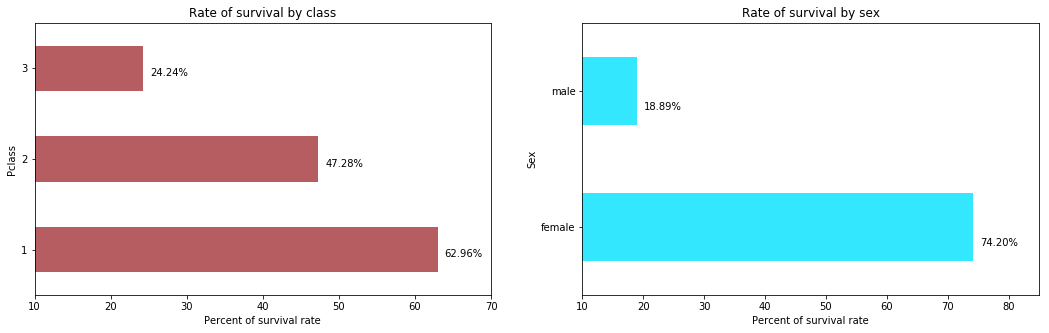

In [3]:
# Hypotheses 1.) Passenger in first class may be the highest rate of survival
#finding mean of survival rate each class by using groupby
SurvivedClass = df.groupby('Pclass')['Survived'].mean()*100
#finding survival rate by using sex attribute
# Hypotheses 2.) Female may have more advantage in survival chance than male passenger
# discovering mean of survival rate by using sex factor
SurvivedSex = df.groupby('Sex')['Survived'].mean()*100

# creating subplot
fig, (axis1,axis2) = plt.subplots(1,2, figsize=(18,5))
ax = SurvivedClass.plot.barh(ax=axis1 ,color='#B55D60', title='Rate of survival by class')
ax.set_xlabel('Percent of survival rate')
# set scale for x-axis
ax.set_xlim(10,70)
# To create annotage for graph 1
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width()+'%', (p.get_x() + p.get_width(), p.get_y()), xytext=(7, 15), textcoords='offset points')
ax = SurvivedSex.plot.barh(ax=axis2, color='#33E7FF', title='Rate of survival by sex')
ax.set_xlabel('Percent of survival rate')
# set scale for x-axis
ax.set_xlim(10,85)
# To create annotage for graph 2
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width()+'%', (p.get_x() + p.get_width(), p.get_y()), xytext=(7, 15), textcoords='offset points')
# Two graphs below show that the highest percentage of survival falls in the first class group, while the lowest is in third
# class group. The interesting point in second bar graph demonstrates that there is a huge gap between the rate of survival
# between male and female about 4 times.

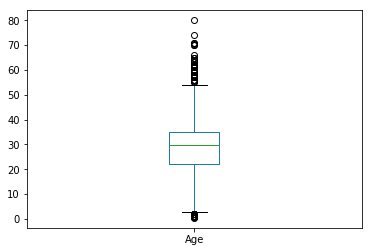

In [4]:
Age = df.copy()
# fill NaN value by using fillna function which value filled is the mean or average of age
Age2 = Age.fillna(value = Age.Age.mean())
# Filtering only Survived Sex and Age
Age3 = Age2[['Survived','Sex','Age']]
# Child variable contains Age of child less than 13, while old contains more than 64
Child = Age3[Age3.Age < 13]
Old = Age3[Age3.Age > 64]

SurvivedChild = Child.groupby('Sex')['Age'].count()
SurvivedOld = Old.groupby('Sex')['Age'].count()

Try = pd.concat([SurvivedChild, SurvivedOld], axis=1, keys=['Child', 'Elder'])
Try = Try.fillna(value = 0)
# to investigate the range of the Titanic's passenger age
Age4 = Age3['Age']
Age4.plot.box()
# The range between 21 and 36 is the majority range of age in the Titanic's passenger of which the average are 26 year old
# There are only few children (less than 13) and elder (more than 64)

In [5]:
Try
# The data shows that the number of children on Titanic are 69 and number of elders are 11
# The percentage of boy and girl age is very close to 50-50, but there are no female for age more than 64

,Child,Elder
female,32,0.0
male,37,11.0


/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


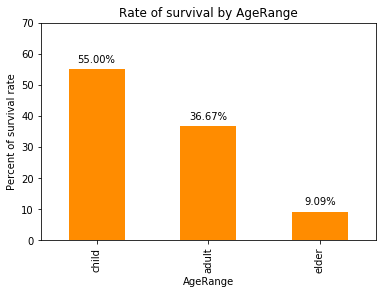

In [6]:
# setup age range to three group child (0-15), adult (between 16 and 64), elder (65 - 90)
Age3['AgeRange'] = pd.cut(Age3['Age'],[0,16,64,90], labels=['child', 'adult','elder'])
Age7 = Age3.copy()
AgeMean = Age7.groupby('AgeRange')['Survived'].mean()*100
#Hypotheses 3.) Child (0-15) would be the group which is the highest rate of survival group and elder group (65-90) would be the lowest rate of survival
ax1 = AgeMean.plot.bar(color='#FF8C00', title='Rate of survival by AgeRange')
ax1.set_ylabel('Percent of survival rate')
ax1.set_ylim(0,70)
for q in ax1.patches:
    ax1.annotate("%.2f" % q.get_height() + '%', (q.get_x() + q.get_width() / 2., q.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# The result of the graph below shows that the hypotheses 3 was accepted h0. The highest rate of suvival was in child group and the lowest rate of survival was in elder group

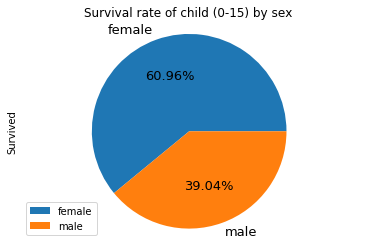

In [7]:
# As graph above demonstrates the rate of survival by group and the highest group is child group
# This section will investigate more about survival by using Child group to find question "Is there any different between male and female in rate of survival among child group"
#ax2 = SurvivedChild.plot.pie()
Age4 = Age2[['Survived','Sex','Age']]
Age5 = Age4.copy()
# Choosing only age from 0 to 15
Age5['AgeRange'] = pd.cut(Age4['Age'],[0,16], labels=['child'])
# Only child in dataFrame
AgeDrop = Age5.dropna(axis=0)
# Calculate average of male and female who survived on the Titanic among child group
SurRateChild = AgeDrop.groupby('Sex')['Survived'].mean()*100
# Hypotheses 4.) Advantageous for survival to be boy rather than girl
ax2 = SurRateChild.plot.pie(autopct='%0.2f%%',fontsize=13,title = 'Survival rate of child (0-15) by sex')
ax2.axis('equal')
ax2.legend()
# The graph shows that the percentage of girl survival is almost twice than the boy. Moreover,
# the result did not accept hypotheses 4

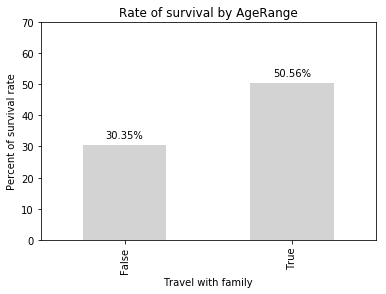

In [8]:
# this section will investigate the number of Siblings/Spouses or Parents/Children
TravelFam = df.copy()
TravelFam1 = TravelFam[['SibSp','Parch','Survived']]
# To create new columns showing people who travels with their family with at least one Sib or one Parch
TravelFam2 = TravelFam1.copy()
TravelFam2['Travel with family'] = (TravelFam1['SibSp'] > 0) | (TravelFam1['Parch'] > 0)
# To find the rate of survival percentage of family travelling on the Titanic
SurFam = TravelFam2.groupby('Travel with family')['Survived'].mean()*100
# Hypotheses 5.) Travelling with family would have more chance in survival than no family
ax1 = SurFam.plot.bar(color='#D3D3D3', title='Rate of survival by AgeRange')
ax1.set_ylabel('Percent of survival rate')
ax1.set_ylim(0,70)
for q in ax1.patches:
    ax1.annotate("%.2f" % q.get_height() + '%', (q.get_x() + q.get_width() / 2., q.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# A graph below shows that having family at least one family member increases the oppotunity to survive on the Titanic

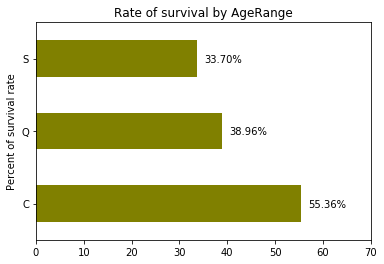

In [9]:
# This sections will provide the rate between survival and embarked passengers
em = df.copy()
em1 = em[['Survived','Embarked']]
em2 = em1.groupby('Embarked')['Survived'].mean()*100
# Hypotheses 6.) The percentage of each embarked passenger would be similar to the survival
ax1 = em2.plot.barh(color='#808000', title='Rate of survival by AgeRange')
ax1.set_ylabel('Percent of survival rate')
ax1.set_xlim(0,70)
for p in ax1.patches:
    ax1.annotate("%.2f" % p.get_width()+'%', (p.get_x() + p.get_width(), p.get_y()), xytext=(7, 15), textcoords='offset points')
# The result provides that C embarked passengers has the highest number of survive on the Titanic, but S and Q embarked passengers have similar result of 35 percent

In [10]:
# Overall passenger attributes such as Pclass, Travel with family, Sex, Age give a good prediction
# of survival on the Titanic